In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA

plt.rcParams["figure.figsize"] = (15,6)

In [3]:
df_de = pd.read_csv("data/open_tasks_DE.csv")
df_en = pd.read_csv("data/open_tasks_EN.csv")

In [4]:
data_de = df_de["description"]
data_en = df_en["description"]
len(data_de), len(data_en)

(1591, 285)

In [5]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/faten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
german_stop_words = stopwords.words('german')
vectorizer_de = TfidfVectorizer(
    max_df=0.9,
    min_df=0.01,
    stop_words=german_stop_words,
)

english_stop_words = stopwords.words('english')
vectorizer_en = TfidfVectorizer(
    max_df=0.9,
    min_df=0.01,
    stop_words=english_stop_words + german_stop_words,
)

In [31]:
X_tfidf_de = vectorizer_de.fit_transform(data_de)
print(f"n_samples: {X_tfidf_de.shape[0]}, n_features: {X_tfidf_de.shape[1]}")

X_tfidf_en = vectorizer_en.fit_transform(data_en)
print(f"n_samples: {X_tfidf_en.shape[0]}, n_features: {X_tfidf_en.shape[1]}")

n_samples: 1591, n_features: 125
n_samples: 285, n_features: 380


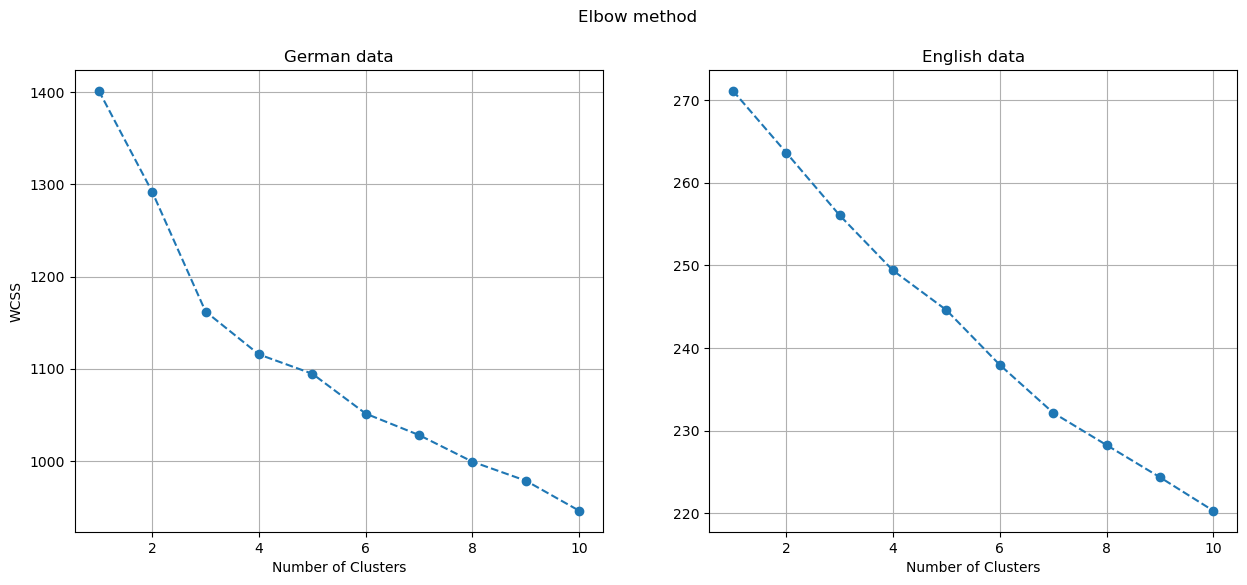

In [32]:
# Perform KMeans clustering for different number of clusters
fig, axs = plt.subplots(1, 2, sharex=True)

wcss_de = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_tfidf_de)
    wcss_de.append(kmeans.inertia_)

wcss_en = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_tfidf_en)
    wcss_en.append(kmeans.inertia_)

# Plot the elbow method graph
axs[0].plot(range(1, 11), wcss_de, marker='o', linestyle='--')
axs[1].plot(range(1, 11), wcss_en, marker='o', linestyle='--')

title = fig.suptitle("Elbow method")
axs[0].title.set_text('German data')
axs[1].title.set_text('English data')
axs[0].set_ylabel("WCSS")
axs[0].set_xlabel('Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[0].grid(True)
axs[1].grid(True)

In [33]:
X_pca_de = PCA(n_components=2).fit_transform(X_tfidf_de.toarray())
X_pca_en = PCA(n_components=2).fit_transform(X_tfidf_en.toarray())

In [34]:
k = 3
kmeans_de= KMeans(
    n_clusters=k,
    max_iter=100,
    n_init=3,
    random_state=42,
).fit(X_pca_de)

k=6
kmeans_en = KMeans(
    n_clusters=k,
    max_iter=100,
    n_init=3,
    random_state=42,
).fit(X_pca_en)


cluster_ids, cluster_sizes = np.unique(kmeans_de.labels_, return_counts=True)
cluster_ids_aug, cluster_sizes_aug = np.unique(kmeans_en.labels_, return_counts=True)

print(f"Number of elements assigned to each cluster, German data: {cluster_sizes}")
print(f"Number of elements assigned to each cluster, English data: {cluster_sizes_aug}")

Number of elements assigned to each cluster, German data: [1065  364  162]
Number of elements assigned to each cluster, English data: [175  12   8  20   9  61]


In [35]:
# Change these variables before saving figure
title = 'KMeans Clustering of GERMAN Task Descriptions of Cornelsen and EKV_Physik'
fig_name = "clusters_DE.png"

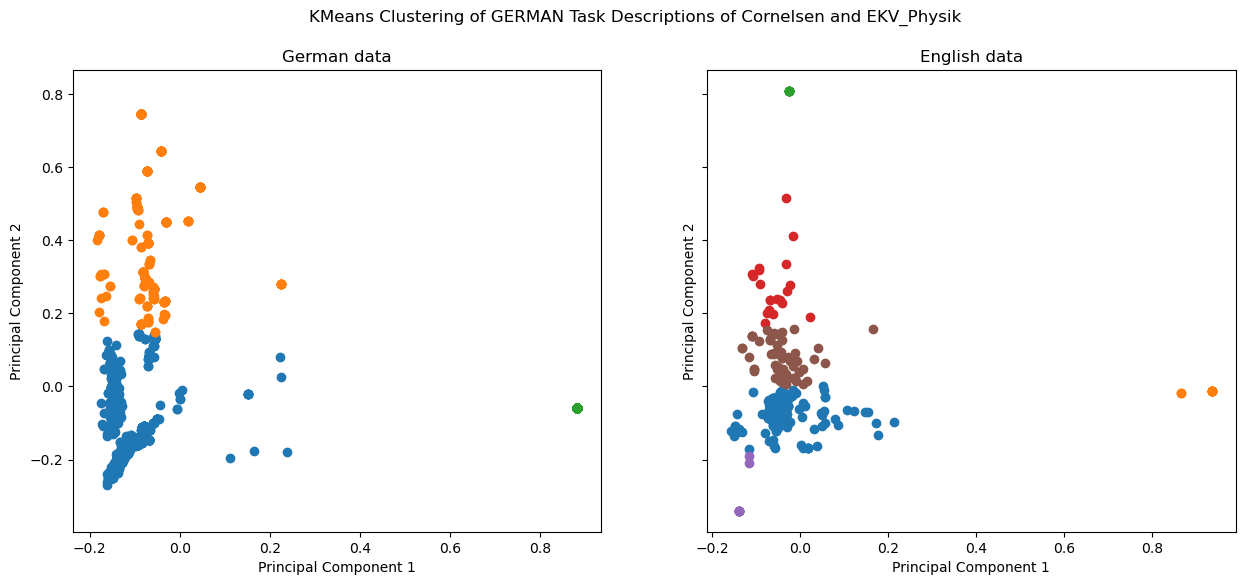

In [36]:
# Plotting
fig, axs = plt.subplots(1, 2, sharey=True)

for cluster in range(k):
    axs[0].scatter(X_pca_de[kmeans_de.labels_ == cluster, 0], X_pca_de[kmeans_de.labels_ == cluster, 1], label=f'Cluster {cluster+1}')

for cluster in range(k):
    axs[1].scatter(X_pca_en[kmeans_en.labels_ == cluster, 0], X_pca_en[kmeans_en.labels_ == cluster, 1], label=f'Cluster {cluster+1}')


fig.suptitle(title)
axs[0].title.set_text('German data')
axs[1].title.set_text('English data')

axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

# plt.legend()
plt.show()

In [37]:
# fig.savefig("figures/"+fig_name, bbox_inches="tight") 

**Looking at the topics in each cluster**

In [14]:
df["cluster"] = kmeans.labels_

NameError: name 'df' is not defined

In [ ]:
df[df["cluster"] == 0]["topic"].dropna()

In [ ]:
list(df[df["cluster"] == 1]["topic"].dropna())

In [ ]:
list(df[df["cluster"] == 2]["topic"].dropna())